 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [71]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [72]:
# Read whale_returns.csv
whale_returns_filepath = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_filepath, index_col=["Date"], infer_datetime_format=True, parse_dates=True)

In [73]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [74]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

# Verify nulls are removed
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [75]:
# Reading algorithmic returns
algo_returns_filepath = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_filepath, index_col=["Date"], infer_datetime_format=True, parse_dates=True)

In [76]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [77]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

# Verify nulls are removed
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [78]:
# Reading S&P 500 Closing Prices
sp500_history_filepath = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_filepath, index_col=["Date"], infer_datetime_format=True, parse_dates=True)

In [79]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [80]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype(float)

sp500_history_df.dtypes

Close    float64
dtype: object

In [81]:
# Calculate Daily Returns
sp500_history_df = sp500_history_df.sort_index()
sp500_returns_df = sp500_history_df.pct_change()

In [82]:
# Drop nulls
sp500_returns_df = sp500_returns_df.dropna()

In [83]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P 500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [84]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")
combined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

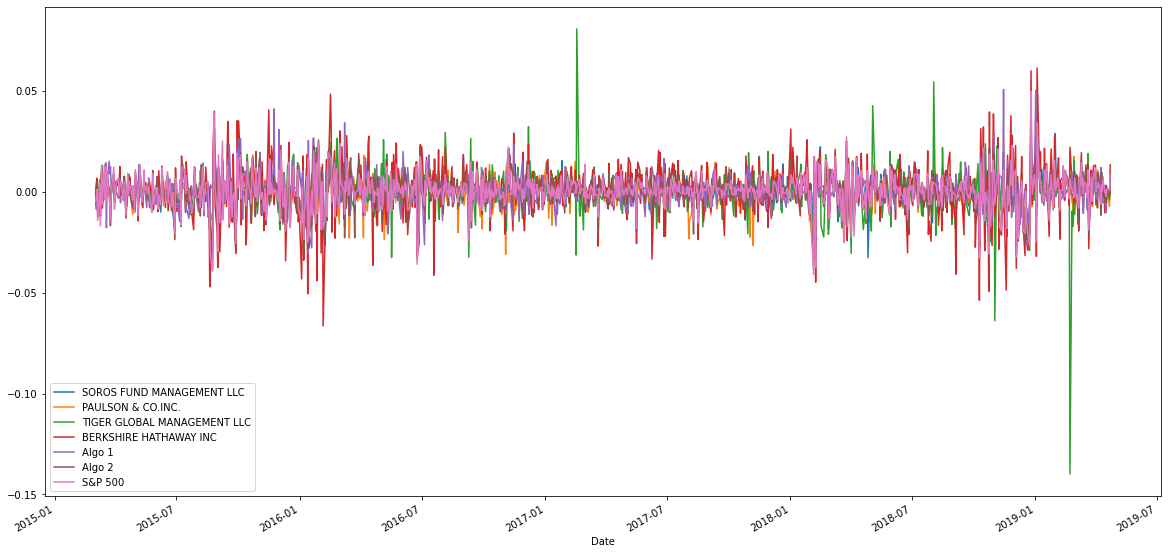

In [85]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

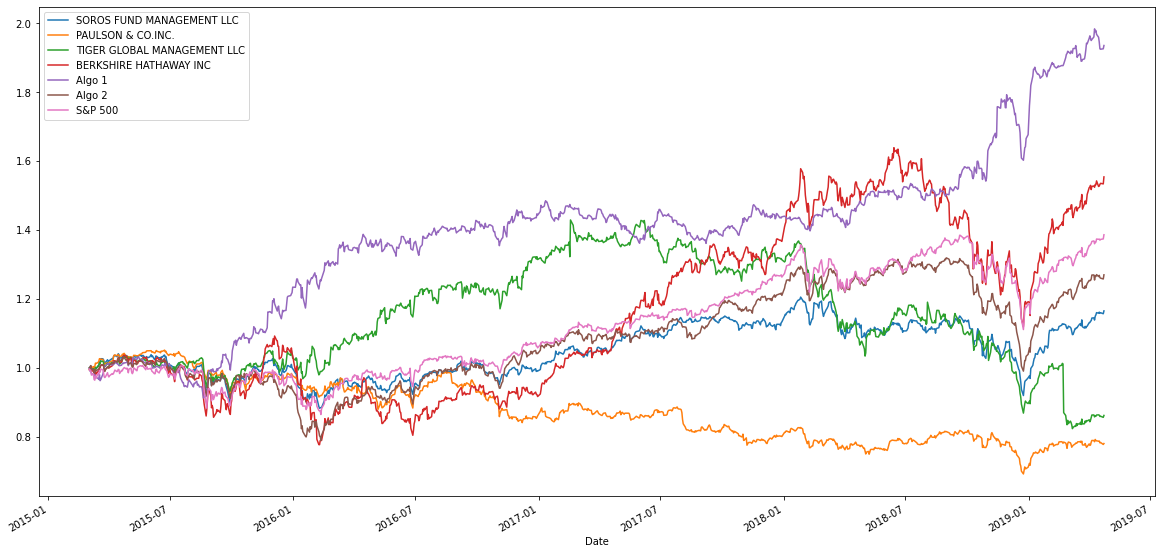

In [86]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


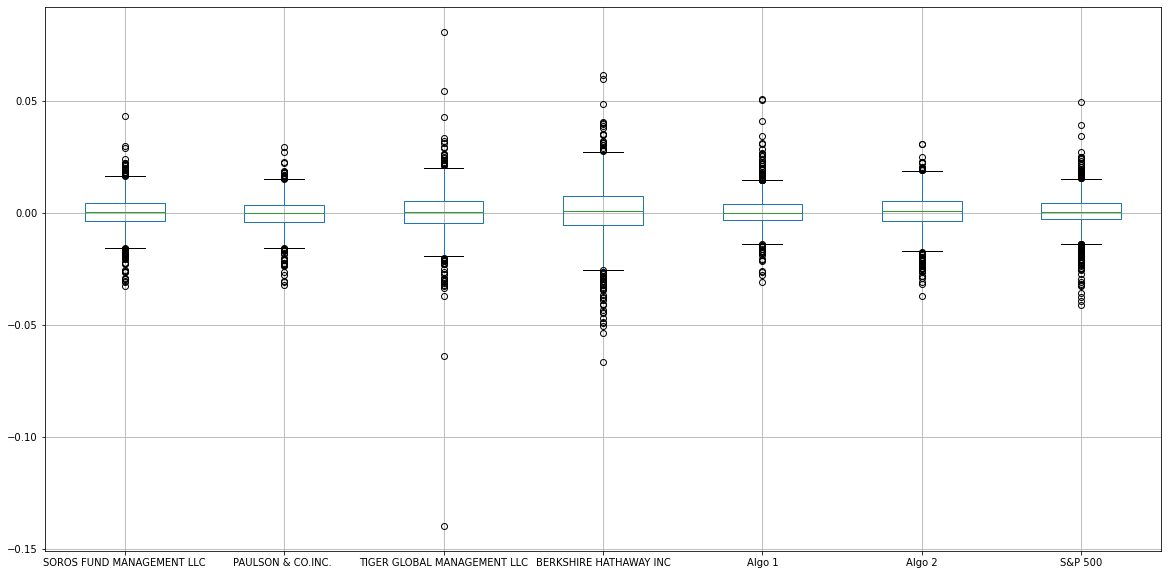

In [87]:
# Box plot to visually show risk
combined_returns_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [88]:
# Calculate the daily standard deviations of all portfolios
combined_std_df = combined_returns_df.std()

### Determine which portfolios are riskier than the S&P 500

In [89]:
# Calculate the daily standard deviation of S&P 500
sp500_std = combined_returns_df["S&P 500"].std()
print(f"S&P 500 Standard Deviation: {sp500_std:.6f}")

# Determine which portfolios are riskier than the S&P 500
combined_std_df.sort_values(ascending=False)

S&P 500 Standard Deviation: 0.008554


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

Tiger Global Management LLC and Berkshire Hathaway Inc are riskier than the S&P 500 because it has higher standard deviation

### Calculate the Annualized Standard Deviation

In [90]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_df.std() * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

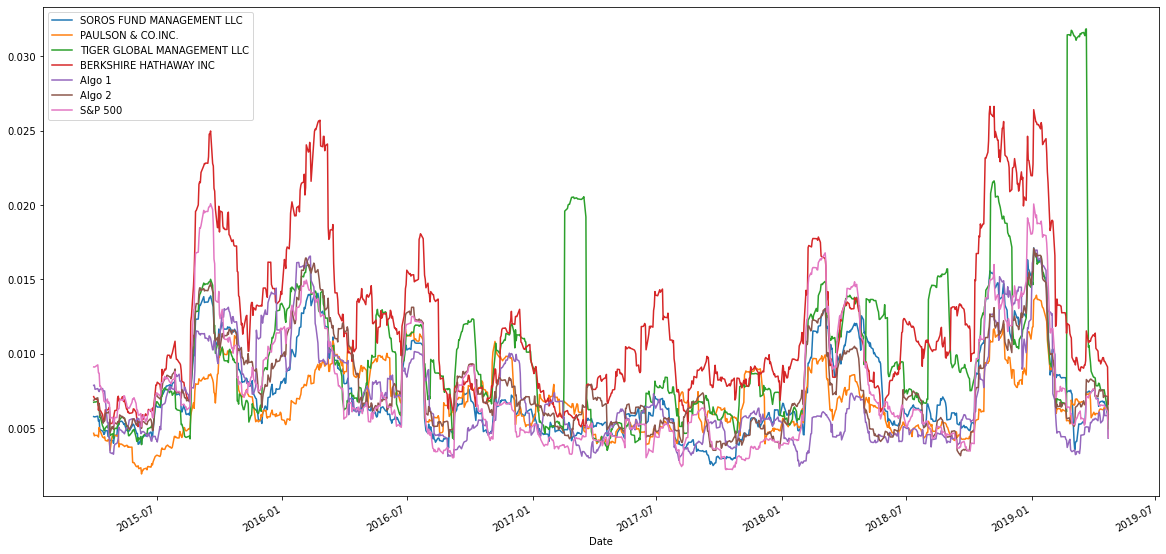

In [91]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = combined_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_21.plot(figsize=(20,10))

### Calculate and plot the correlation

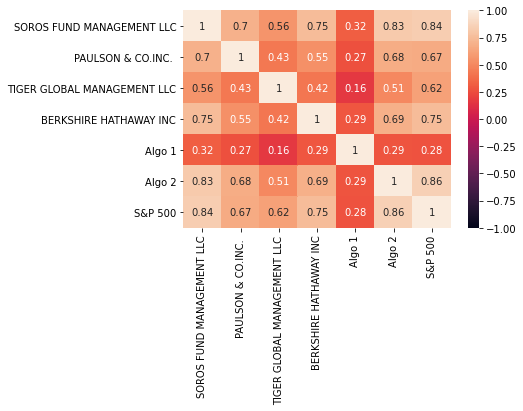

In [92]:
# Calculate the correlation
combined_correlation = combined_returns_df.corr(method="pearson")

# Display the correlation matrix
sns.heatmap(combined_correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

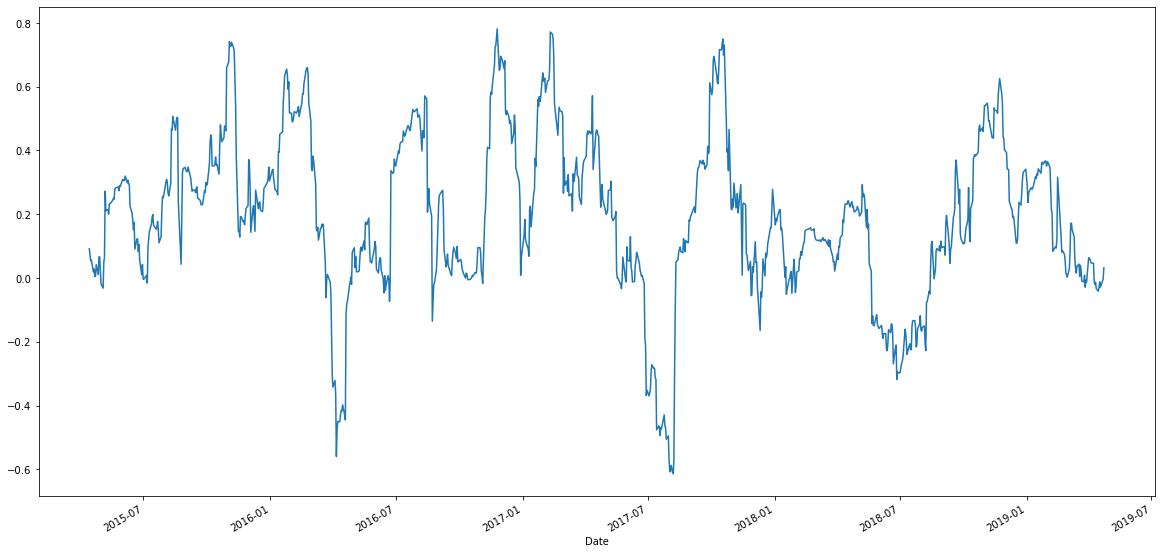

In [93]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_returns_df["Algo 1"].cov(combined_returns_df["S&P 500"])

# Calculate variance of S&P 500
sp500_variance = combined_returns_df["S&P 500"].var()

# Computing beta
algo1_beta = algo1_covariance / sp500_variance

# Plot beta trend
algo1_rolling30_cov = combined_returns_df["Algo 1"].rolling(window=30).cov(combined_returns_df["S&P 500"])
sp500_rolling30_var = combined_returns_df["S&P 500"].rolling(window=30).var()
algo1_rolling30_beta = algo1_rolling30_cov / sp500_rolling30_var
algo1_rolling30_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

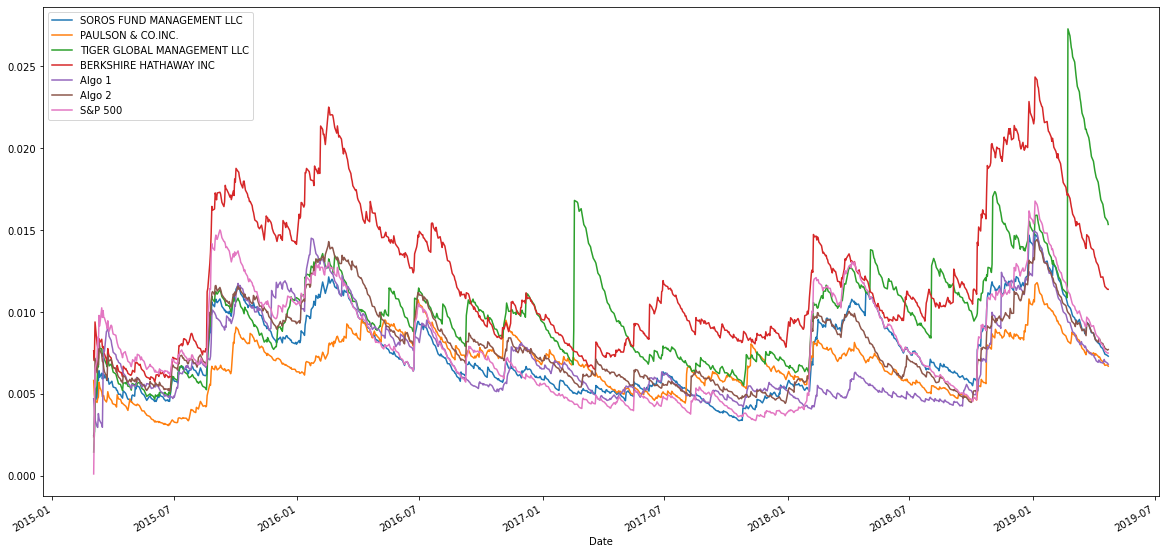

In [94]:
# Use `ewm` to calculate the rolling window
ewm_21 = combined_returns_df.ewm(halflife=21).std()

ewm_21.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [95]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_returns_df.mean() * 252) - 0.0025) / annualized_std
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.336470
PAULSON & CO.INC.             -0.505994
TIGER GLOBAL MANAGEMENT LLC   -0.135516
BERKSHIRE HATHAWAY INC         0.609620
Algo 1                         1.357982
Algo 2                         0.482486
S&P 500                        0.629856
dtype: float64

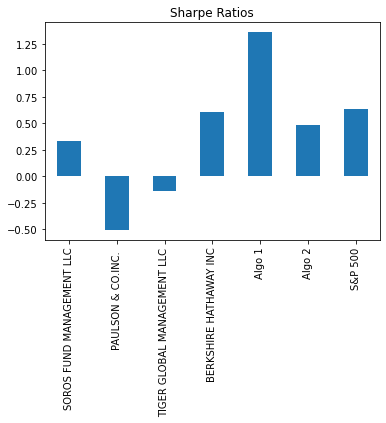

In [96]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [97]:
# Reading data from 1st stock
goog_filepath = Path("Resources/GOOG.csv")
goog_df = pd.read_csv(goog_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
goog_df.head()

,Close
Date,
2019-11-01 16:00:00,128.16
2019-11-04 16:00:00,126.88
2019-11-05 16:00:00,125.06
2019-11-06 16:00:00,127.03
2019-11-07 16:00:00,127.03


In [98]:
# Reading data from 2nd stock
fb_filepath = Path("Resources/FB.csv")
fb_df = pd.read_csv(fb_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
fb_df.head()

,Close
Date,
2019-11-01 16:00:00,193.62
2019-11-04 16:00:00,194.72
2019-11-05 16:00:00,194.32
2019-11-06 16:00:00,191.55
2019-11-07 16:00:00,190.42


In [99]:
# Reading data from 3rd stock
msft_filepath = Path("Resources/MSFT.csv")
msft_df = pd.read_csv(msft_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
msft_df.head()

,Close
Date,
2019-11-01 16:00:00,143.72
2019-11-04 16:00:00,144.55
2019-11-05 16:00:00,144.46
2019-11-06 16:00:00,144.06
2019-11-07 16:00:00,144.26


In [100]:
# Reading data from S&P 500
sp500_filepath = Path("Resources/SP500.csv")
sp500_df = pd.read_csv(sp500_filepath, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-11-01 16:00:00,3066.91
2019-11-04 16:00:00,3078.27
2019-11-05 16:00:00,3074.62
2019-11-06 16:00:00,3076.78
2019-11-07 16:00:00,3085.18


In [101]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([goog_df, fb_df, msft_df], axis="columns", join="inner")
combined_stocks_df.columns = ["GOOG", "FB", "MSFT"]
combined_stocks_df.head()

,GOOG,FB,MSFT
Date,,,
2019-11-01 16:00:00,128.16,193.62,143.72
2019-11-04 16:00:00,126.88,194.72,144.55
2019-11-05 16:00:00,125.06,194.32,144.46
2019-11-06 16:00:00,127.03,191.55,144.06
2019-11-07 16:00:00,127.03,190.42,144.26


In [102]:
# Reset Date index
combined_stocks_df.sort_index(inplace=True)
combined_stocks_df.head()

,GOOG,FB,MSFT
Date,,,
2019-11-01 16:00:00,128.16,193.62,143.72
2019-11-04 16:00:00,126.88,194.72,144.55
2019-11-05 16:00:00,125.06,194.32,144.46
2019-11-06 16:00:00,127.03,191.55,144.06
2019-11-07 16:00:00,127.03,190.42,144.26


In [103]:
# Reorganize portfolio data by having a column per symbol


In [104]:
# Calculate daily returns
stocks_daily_returns = combined_stocks_df.pct_change()

# Drop NAs
stocks_daily_returns = stocks_daily_returns.dropna()

# Display sample data
stocks_daily_returns.sample(10)

,GOOG,FB,MSFT
Date,,,
2020-01-30 16:00:00,0.050970,-0.061372,0.028208
2020-08-14 16:00:00,-0.001705,-0.000230,0.000958
2020-02-18 16:00:00,0.032510,0.016902,0.010143
2020-04-09 16:00:00,0.037097,0.005221,0.000061
2020-04-02 16:00:00,-0.008403,-0.008835,0.020709
2020-02-24 16:00:00,-0.067010,-0.045009,-0.043116
2019-11-26 16:00:00,0.018723,-0.004104,0.005290
2020-04-20 16:00:00,0.039497,-0.005579,-0.019821
2020-07-16 16:00:00,-0.009809,0.002705,-0.019804


In [105]:
sp500_df.columns = ["S&P 500"]
sp500_df.sort_index(inplace=True)
sp500_daily_returns = sp500_df.pct_change().dropna()
sp500_daily_returns.sample(10)

,S&P 500
Date,
2020-04-16 16:00:00,0.005817
2019-11-27 16:00:00,0.004174
2020-03-26 16:00:00,0.062414
2020-05-26 16:00:00,0.012289
2020-02-28 16:00:00,-0.008238
2020-05-04 16:00:00,0.004250
2020-01-02 16:00:00,0.008379
2020-09-23 16:00:00,-0.023721
2020-07-29 16:00:00,0.012428


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [106]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = stocks_daily_returns.dot(weights)

# Display sample data
weighted_returns.sample(10)
# weighted_returns.plot()

# cumu_weighted_returns = (1 + weighted_returns).cumprod()
# cumu_weighted_returns.plot()

Date
2020-06-05 16:00:00   -0.019020
2020-11-02 16:00:00   -0.008707
2020-03-19 16:00:00    0.071341
2020-06-22 16:00:00    0.027048
2020-08-28 16:00:00    0.002021
2020-08-25 16:00:00    0.024355
2020-08-03 16:00:00    0.002735
2020-10-23 16:00:00    0.013125
2020-01-03 16:00:00   -0.003532
2020-02-04 16:00:00    0.038180
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [107]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([stocks_daily_returns, weighted_returns], axis="columns", join="inner")
combined_returns.columns = ["GOOG", "FB", "MSFT", "Portfolio (Weighted)"]

In [108]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns = combined_returns.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [109]:
# Calculate the annualized `std`
combined_annualized_std = combined_returns.std() * np.sqrt(252)
combined_annualized_std

GOOG                    0.586830
FB                      0.442709
MSFT                    0.423493
Portfolio (Weighted)    0.418720
dtype: float64

### Calculate and plot rolling `std` with 21-day window

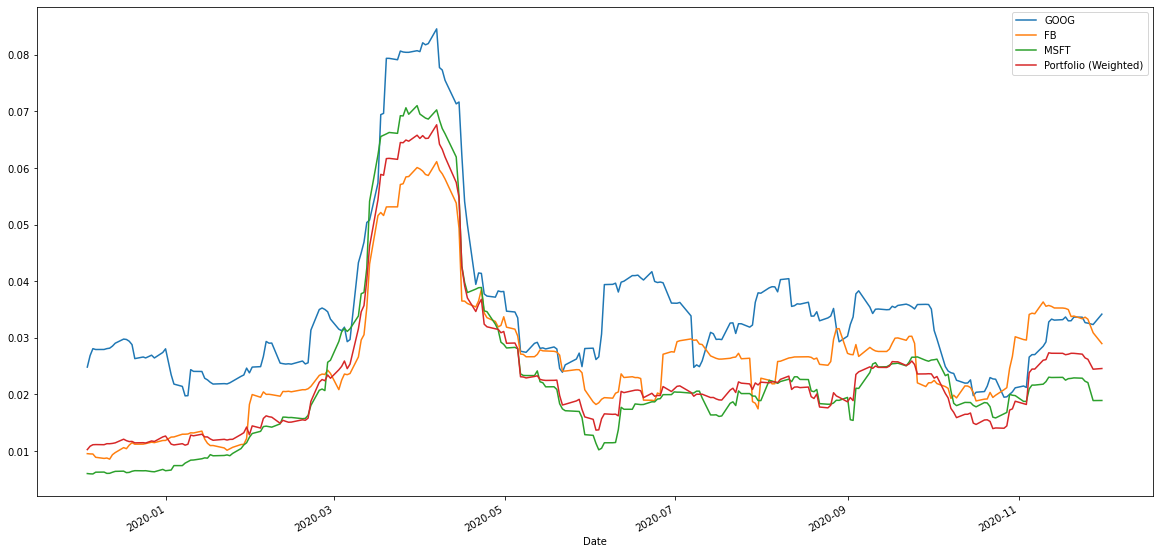

In [110]:
# Calculate rolling standard deviation
combined_rolling21_std = combined_returns.rolling(window=21).std()

# Plot rolling standard deviation
combined_rolling21_std.plot(figsize=(20,10))

### Calculate and plot the correlation

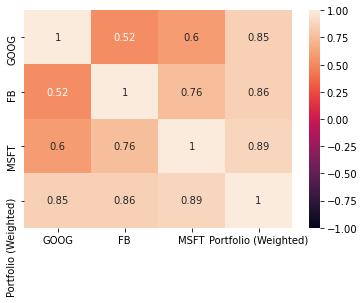

In [111]:
# Calculate and plot the correlation
combined_returns_correlation = combined_returns.corr(method="pearson")

sns.heatmap(combined_returns_correlation, vmin=-1, vmax=1, annot=True)# Calculate covariance of a single portfolio

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

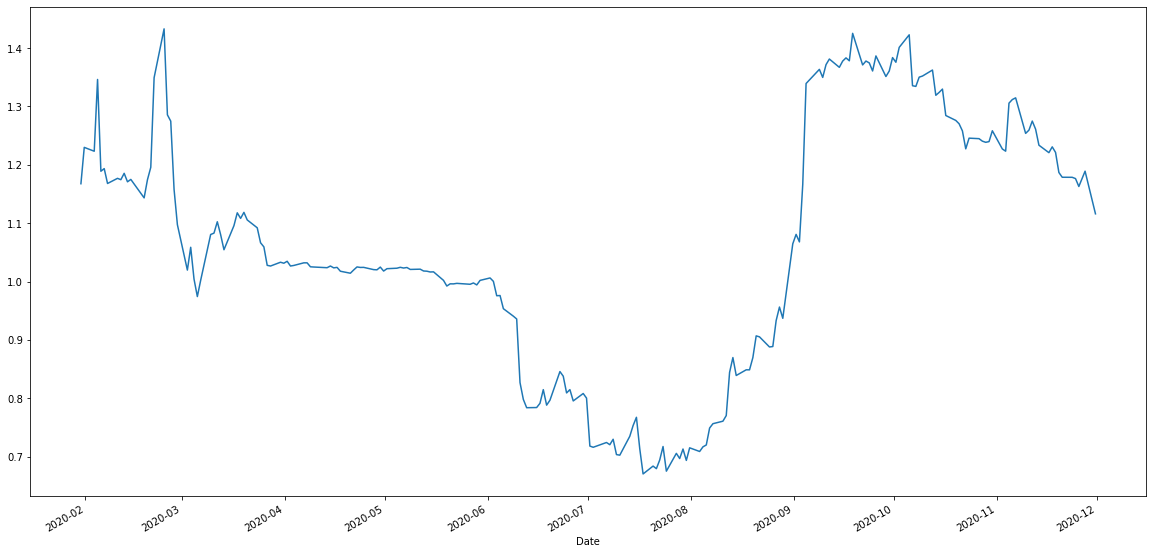

In [112]:


# Calculate and plot Beta
returns_with_sp500 = pd.concat([combined_returns, sp500_daily_returns], axis="columns", join="inner").dropna()
returns_with_sp500.head()

# Calculate covariance of portfolio
portfolio_covariance = returns_with_sp500["Portfolio (Weighted)"].cov(returns_with_sp500["S&P 500"])

# Calculate variance of S&P 500
sp500_variance = returns_with_sp500["S&P 500"].var()

# Computing beta
portfolio_beta = portfolio_covariance / sp500_variance
# portfolio_beta

# Plot beta trend
portfolio_rolling60_cov = returns_with_sp500["Portfolio (Weighted)"].rolling(window=60).cov(returns_with_sp500["S&P 500"])
sp500_rolling60_var = returns_with_sp500["S&P 500"].rolling(window=60).var()
portfolio_rolling60_beta = portfolio_rolling60_cov / sp500_rolling60_var
portfolio_rolling60_beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [113]:
# Calculate Annualized Sharpe Ratios
portfolio_annualized_std = returns_with_sp500.std() * np.sqrt(252)
portfolio_sharpe_ratios = ((returns_with_sp500.mean() * 252) - 0.0025) / portfolio_annualized_std

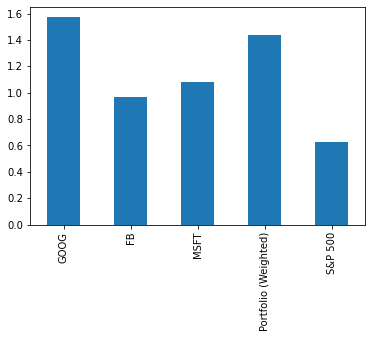

In [114]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

Portfolio does better than S&P 500 but not as well as Google